In [7]:
import ffn
%matplotlib inline
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import pickle

import requests

Q1畫出 diamond shape

In [1]:
def pyramid (n):
    for i in range (n):
        print(" "*(n-i)+"*"*(2*i+1))

In [3]:
pyramid (10)

          *
         ***
        *****
       *******
      *********
     ***********
    *************
   ***************
  *****************
 *******************


In [18]:
def diamond (n):
    for i in range (n):
        print(" "*(n-i-1)+"*"*(2*i+1))
    for j in range (n,0,-1):
        print(" "*(n-j)+"*"*(2*j))

In [19]:
diamond(10)

         *
        ***
       *****
      *******
     *********
    ***********
   *************
  ***************
 *****************
*******************
********************
 ******************
  ****************
   **************
    ************
     **********
      ********
       ******
        ****
         **


Q2刪除重複性的資料

Q3下載台灣上市公司基本資料

In [3]:
import requests

In [61]:
r = requests.get("http://dts.twse.com.tw/opendata/t187ap03_L.csv")
r.encoding = 'Big5'
data = r.text.split("\r\n")

In [62]:
df = pd.DataFrame(data)
df

,0
0,"106年12月13日17:30:01公司基本資料,"
1,"""公司代號"",""公司名稱"",""產業別"",""住址"",""營利事業統一編號"",""董事長"",""總經理..."
2,"""1101"",""台灣水泥股份有限公司"",""水泥工業"",""台北市中山北路2段113號"",""11..."
3,"""1102"",""亞洲水泥股份有限公司"",""水泥工業"",""台北市大安區敦化南路2段207號30..."
4,"""1103"",""嘉新水泥股份有限公司"",""水泥工業"",""台北市中山北路2段96號"",""118..."
5,"""1104"",""環球水泥股份有限公司"",""水泥工業"",""台北市南京東路二段125號10樓"",..."
6,"""1108"",""幸福水泥股份有限公司"",""水泥工業"",""台北市松江路237號15樓"",""40..."
7,"""1109"",""信大水泥股份有限公司"",""水泥工業"",""台北市寶慶路37號7樓"",""0327..."
8,"""1110"",""東南水泥股份有限公司"",""水泥工業"",""高雄市前金區五福三路21號4樓之1""..."
9,"""1201"",""味全食品工業股份有限公司"",""食品工業"",""台北市松江路125號"",""113..."


In [66]:
from io import StringIO

data = StringIO(r.text)
pd.read_csv(data, skiprows=1)

,公司代號,公司名稱,產業別,住址,營利事業統一編號,董事長,總經理,發言人,發言人職稱,代理發言人,...,特別股,編制財務報表類型,股票過戶機構,過戶電話,過戶地址,英文簡稱,英文通訊地址,傳真機號碼,電子郵件信箱,網址
1101,台灣水泥股份有限公司,水泥工業,台北市中山北路2段113號,11913502.0,張安平,李鐘培,黃健強,資深副總經理,蔡立文,(02)2531-7099,...,1.0,中國信託商業銀行代理部,66365566,台北市重慶南路一段83號5樓,TCC,"No.113, Sec.2, Zhongshan N. Rd.,Taipei City 10...",(02)2531-6529,finance@taiwancement.com,http://www.taiwancement.com,NaN
1102,亞洲水泥股份有限公司,水泥工業,台北市大安區敦化南路2段207號30、31樓,3244509.0,徐旭東,李坤炎,周維崑,副總經理,吳玲綾,02-2733-8000,...,1.0,亞東證券股份有限公司,02-2361-8608,台北市重慶南路一段86號3樓,ACC,"30TH FLOOR,TAIPEI METRO TOWER,207.TUN HWA SOUT...",02-2378-5191,service@acc.com.tw,www.acc.com.tw,NaN
1103,嘉新水泥股份有限公司,水泥工業,台北市中山北路2段96號,11892801.0,張剛綸,祁士鉅,王立心,執行副總經理,余曉芸,(02)2551-5211,...,1.0,群益金鼎證券股份有限公司股代部,(02)2702-3999,台北市敦化南路2段97號地下2樓,CHC,"No.96, Sec. 2, Zhongshan N. Rd., Zhongshan Dis...",(02)2511-4002,investor-relations@chcgroup.com.tw,www.chcgroup.com.tw,NaN
1104,環球水泥股份有限公司,水泥工業,台北市南京東路二段125號10樓,7568009.0,侯博義,侯博義,楊宗仁,經理,詹志鴻,02-25077801,...,1.0,凱基證券股份有限公司股務代理部,02-23892999,﹝100﹞台北市重慶南路一段2號5樓,UCC,"10th F1., 125 Nanking E.Rd Sec. 2,Taipei Taiwan",02-25075870,ucc@ucctw.com,www.ucctw.com,NaN
1108,幸福水泥股份有限公司,水泥工業,台北市松江路237號15樓,40601248.0,陳兩傳,陳兩傳,溫秀菊,財務部經理,陳一誠,25092188,...,1.0,永豐金證券股務代理,2381-6288,台北市中正區博愛路17號3樓,LUCKY CEMENT,"15TH FL.,NO.237,SUNG KIANG RD.,TAIPEI,TAIWAN,R...",25048672,"wendy@luckygrp,com.tw",www.luckygrp.com.tw,NaN
1109,信大水泥股份有限公司,水泥工業,台北市寶慶路37號7樓,3279507.0,楊智雄,楊智雄,吳連富,副總經理,林坤榮,(02)23816731,...,1.0,中國信託商業銀行代理部,(02)6636-5566,台北巿重慶南路一段83號5樓,HsingTa,"7TH FL.,No.37 Pao Ching RoadTaipei Taiwan R.O.C.",23314086,service@hsingta.com.tw,www.hsingta.com.tw,NaN
1110,東南水泥股份有限公司,水泥工業,高雄市前金區五福三路21號4樓之1,83078600.0,陳敏斷,吳長直,黃薪翰,財務部經理,唐榮宗,07-2711121,...,1.0,元大證券股份有限公司,02-25865859,台北市承德路三段210號地下室1樓,TUNA CEMENT,"NO.21 Wu Fu 3 RoadKaohsiung, Taiwan, R.O.C.",07-9505895,southeast@secement.com,www.southeastcement.com.tw,NaN
1201,味全食品工業股份有限公司,食品工業,台北市松江路125號,11347802.0,陳永清,蘇守斌,張美凰,財務長,─,(02)25065020,...,1.0,元大證券股務代理部,(02)25865859,台北市大同區承德路3段210號地下一樓,Wei Chuan,"10F., No.125, Sung Chiang Rd.Taipei, Taiwan(R....",(02)25063182,service@weichuan.com.tw,http://www.weichuan.com.tw,NaN
1203,味王股份有限公司,食品工業,台北市中山北路二段79號5樓,7067309.0,陳清福,陳恭平,魏璟雄,經理,李兆弘,(02)25717271,...,1.0,群益金鼎證券股份有限公司,27023999,台北市敦化南路二段97號地下2樓,VE WONG,"5TH FL., 79 CHUNG SHAN N. RD., SEC.2TAIPEI TAIWAN",(02)25811006,wei@vewong.com.tw,http://www.vewong.com,NaN
1210,大成長城企業股份有限公司,食品工業,台南市永康區蔦松二街三號,73008303.0,韓家宇,莊坤炎,周叔恆,特助,常岡德,06-2531111,...,1.0,中國信託商業銀行代理部,02-66365566,台北市重慶南路一段八十三號六樓,GREATWALL,3 NIAOSUN 2TH STREETYONGKONG TAINAN CONTY TAIWAN,06-2534596,john@greatwall-group.com,http://www.dachan.com,NaN


Q4畫出技術曲線

In [80]:
import talib
from talib import MA_Type

In [81]:
with open('stockdata', 'rb') as f:
    data = pickle.load(file=f)

In [82]:
type(df['Close'].values)

numpy.ndarray

In [83]:
df = data['GOOG']

In [85]:
upper, middle, lower = talib.BBANDS(df['Close'].values, matype=MA_Type.T3)

In [86]:
df['UBB']=upper

In [87]:
df['MBB']=middle

In [88]:
df['LBB']=lower

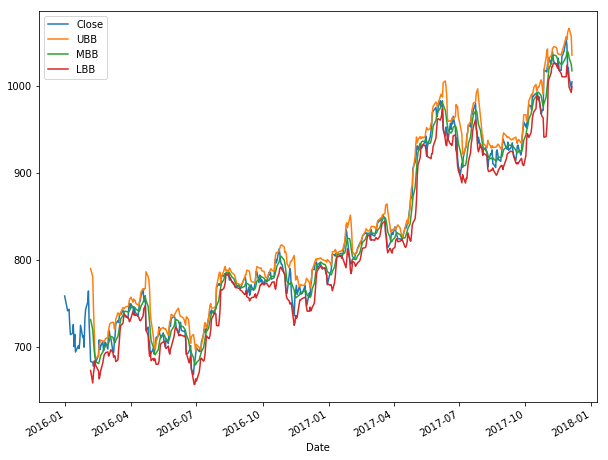

In [89]:
df[['Close', 'UBB', 'MBB','LBB']].plot(legend='best', figsize=(10,8))

Q5策略回測